<font size="6"><b>NEURAL NETWORKS: BASICS</b></font>

<font size="5"><b>Serhat Çevikel</b></font>

In [ ]:
library(tidyverse)
library(data.table)
library(plotly)
library(BBmisc)

In [ ]:
options(repr.matrix.max.rows=20, repr.matrix.max.cols=15) # for limiting the number of top and bottom rows of tables printed 

![xkcd](../imagesba/network.png)

(https://xkcd.com/350/)

In this session we will go through the basic concepts and calculations of neural networks again with a toy example.

Note that "deep learning", a popular term in recent years, is a special case of neural networks with additional complexity.

# Basic Constituents

Now first the formal definition of a neural network:

A neural network consists of connected units or nodes called artificial neurons, which loosely model the neurons in the brain.
These neurons are connected by edges, which model the synapses in the brain.
Each artificial neuron receives signals from connected neurons, then processes them and sends a signal to other connected neurons.
The "signal" is a real number, and the output of each neuron is computed by some non-linear function of the totality of its inputs, called the activation function. 
The strength of the signal at each connection is determined by a weight, which adjusts during the learning process.

Typically, neurons are aggregated into layers.
Different layers may perform different transformations on their inputs.
Signals travel from the first layer (the input layer) to the last layer (the output layer), possibly passing through multiple intermediate layers (hidden layers).
A network is typically called a deep neural network if it has at least two hidden layers.

(https://en.wikipedia.org/wiki/Neural_network_(machine_learning))

In this definition we spot some terms which are crucial for understanding NNs:

- Neuron (or nodes)
- Edges (or connections)
- Weight
- Activation function
- Layers

We know that, in multiple linear regression with OLS, we model the response variable as a linear combination of predictor variables. The true model is:

${\displaystyle \mathbf {y} = \mathbf {X} {\boldsymbol {\beta }} + {\boldsymbol {\epsilon }}}$

And the estimated model is:

${\displaystyle \mathbf {y} = \mathbf {X} {\boldsymbol {\hat \beta }} + {\boldsymbol {e }}}$

For more complex relationships or non-linearities, we can transform the predictors with polynomial terms or logarithm and we can add interaction terms among the predictor variables. However the degree of complexity we can include is limited in multiple linear regression.

With generalized linear models, response variable are *linked* to the linear combination of the predictors through a link function $g$:

${\displaystyle \mathbf \mu=\operatorname g^{-1}(\mathbf X{\boldsymbol {\hat \beta }} )}$

With GLM's, we can model more complex relationships with the selected link function, e.g. binary responses that are hard to model with OLS can be modeled with a logit link, such that the linear prediction on the continuum is transformed into values between 0 and 1 through S-shaped `sigmoid` function.

Now, neural networks carry the flexibility one step further. Let's visually compare the structure of a multiple linear regression model and a neural network:

![nn1](../imagesba/Linear-Regression-vs-Neural-Networks.webp)

(https://www.geeksforgeeks.org/machine-learning/linear-regression-vs-neural-networks-understanding-key-differences/)

In a linear regression we have variable inputs and a fixed input term (for the intercept) and an output (response variable) which is a linear combination of inputs.

In a neural network there is at least one interim layer of computational nodes between the inputs and the output collective known as the hidden layer(s).

Each of those nodes are a linear combination of the inputs (or the outputs of the previous layer) which is transformed through an activation function, shown in the above chart as $\sigma$, just like the inverse link function in GLM.

The fixed columns of 1's in a neural network are known as `bias term`.

While the example above has only one hidden layer, NN's may have multiple layers also:

![nn2](../imagesba/mlp.png)

(http://deeplearning.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/)

This simple network is an example of multilayer perceptron:

In deep learning, a multilayer perceptron (MLP) is a kind of modern feedforward neural network consisting of fully connected neurons with nonlinear activation functions, organized in layers, notable for being able to distinguish data that is not linearly separable.

(https://en.wikipedia.org/wiki/Multilayer_perceptron)

There are more definitions here:

A feedforward neural network is an artificial neural network in which information flows in a single direction – inputs are multiplied by weights to obtain outputs (inputs-to-output). It contrasts with a recurrent neural network, in which loops allow information from later processing stages to feed back to earlier stages.

(https://en.wikipedia.org/wiki/Feedforward_neural_network)

In artificial neural networks, the activation function of a node is a function that calculates the output of the node based on its individual inputs and their weights. Nontrivial problems can be solved using only a few nodes if the activation function is nonlinear.

(https://en.wikipedia.org/wiki/Activation_function)

The multiplicity of the nodes in hidden layers which are linear combinations of previous layers that are fed into activation functions is the source of flexibility of neural networks: These networks can reveal non-linear relationships between the inputs (predictor) and the output (response).

![nn3](../imagesba/NN4.png)

(https://cambiotraining.github.io/intro-machine-learning/ann.html)

In fact neural networks are proved to approximate any continuous function with the necessary structure (number of nodes and layers):

In the field of machine learning, the universal approximation theorems state that neural networks with a certain structure can, in principle, approximate any continuous function to any desired degree of accuracy. These theorems provide a mathematical justification for using neural networks, assuring researchers that a sufficiently large or deep network can model the complex, non-linear relationships often found in real-world data.

(https://en.wikipedia.org/wiki/Universal_approximation_theorem)

Training a neural network is an iterative process similar to training a GLM model. In a GLM model, the parameters (variable coefficients) are updated such that log-likelihood of the data given the parameter set is maximized through Newton-Raphson algorithm. Newton-Raphson algorithm, tries to set the derivative of the log-likelihood function to zero by finding the root of the derivative through successive calculations of the gradient vector (vector of partial derivatives) and Hessian matrix (matrix of second order partial derivatives). So basically in a GLM:

- We plug in the last parameter values for linear predictions
- We transform the linear predictions through inverse link function (sigmoid in the case of logistic regression)
- We calculate the log-likelihood of the data given the parameters
- With the Newton-Raphson algorithm we update the parameter values

In the case of neural networks, the objective function we want to minimize for a better fit is known as the loss function.

In mathematical optimization and decision theory, a loss function or cost function (sometimes also called an error function)[1] is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. An optimization problem seeks to minimize a loss function. An objective function is either a loss function or its opposite (in specific domains, variously called a reward function, a profit function, a utility function, a fitness function, etc.), in which case it is to be maximized. The loss function could include terms from several levels of the hierarchy.

(https://en.wikipedia.org/wiki/Loss_function)

For example the mean squared error as we calculate in OLS regression can be used as the loss function in a neural network. The coefficients in a GLM model, are known as weights in a neural network. As the MLE estimation iterations learn the coefficients in a GLM, in a neural network the learning algorithm learns the weights thaat minimize the loss function. In NNs, the number of parameters can be quite large with additional complexity coming from activation functions. So calculating the Hessian matrix (matrix of second order derivatives) of loss function can become computationally very complex.

(https://stats.stackexchange.com/questions/253632/why-is-newtons-method-not-widely-used-in-machine-learning)

(https://www.linkedin.com/posts/ram-swaminathan_newtons-method-for-optimization-over-a-function-activity-7385667049877987328-4xVu)

In that case, an optimization algorithm that only calculates the first order derivatives (gradients) is used: Gradient descent.

Gradient descent is a method for unconstrained mathematical optimization. It is a first-order iterative algorithm for minimizing a differentiable multivariate function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent:

${\displaystyle \mathbf {a} _{n+1}=\mathbf {a} _{n}-\eta \nabla f(\mathbf {a} _{n})}$

$\eta$ is the learning rate. While a very high learning rate can cause the global minima to be overshoot and skipped, a too low learning rate will cause the convergence of the algorithm to be too long.

(https://en.wikipedia.org/wiki/Gradient_descent)

A 2D animation of the gradient descent algorithm is as follows:

![gd1](../imagesba/gradient_descent.gif)

(https://ml-explained.com/blog/gradient-descent-explained)

As the minima is approach the derivative of the function gets lower so the step sizes - derivative times the learning rate - also gets smaller.

We can also view a 3D animation of the algorithm:

![gd1](../imagesba/GD-IM3.gif)

(https://www.geeksforgeeks.org/machine-learning/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/)

In the setting of a neural network, where we have at least one hidden layer so the gradient of the loss function w.r.t the weights involve finding the derivative of nested functions involve the chain rule.

In calculus, the chain rule is a formula that expresses the derivative of the composition of two differentiable functions f and g in terms of the derivatives of f and g. 

In Lagrange's notation:

${\displaystyle h'(x)=f'(g(x))g'(x).}$

In Leibniz's notation:

${\displaystyle {\frac {dz}{dx}}={\frac {dz}{dy}}\cdot {\frac {dy}{dx}},}$

(https://en.wikipedia.org/wiki/Chain_rule)


After the forward propogation, in which the linear combination of the weights and inputs to each node is computed and transformed with the activation function starting from the first hidden layer until the output layer and the loss function is computed the next step for updating the weights with gradient descent algorithm is known as *backpropagation*:

Backpropagation is a gradient computation method commonly used for training a neural network in computing parameter updates.

It is an efficient application of the chain rule to neural networks. Backpropagation computes the gradient of a loss function with respect to the weights of the network for a single input–output example, and does so efficiently, computing the gradient one layer at a time, iterating backward from the last layer to avoid redundant calculations of intermediate terms in the chain rule.

(https://en.wikipedia.org/wiki/Backpropagation)

Multiple records in a dataset or a complete dataset can also be used for the backprogagation in *batch updating*.

(Claster 2020, Mathematics and Programming for Machine Learning with R, p.290)

# A Simple Neural Network Implementation

Now that we know the basic constituents and concepts of a neural network, we can create a very simple neural network implementation.

We will mostly follow the approach from Claster 2020, Mathematics and Programming for Machine Learning with R, Chapters 11-13.

The network will have:

- Two input variables (+ bias term)
- A hidden layer of fully connected three nodes (+ bias term)
- An output layer of a single node

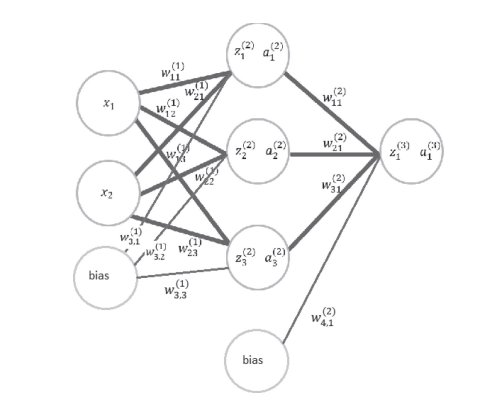

(Claster 2020, Mathematics and Programming for Machine Learning with R, p.306)

The superscripts in parantheses point at the number of the layer:

- Input layer has an index of 1
- Hidden layer has an index of 2
- Output layer has an index of 3

The first subscript in the weights point at the node index that the weight is coming from and the second subscript is the node index in the layer that the weight is going to so:

$w_{13}^{(1)}$ is the weight coming from the first node in the first layer and going to the third node in the second layer.

$z$ values are the linear combinations of the inputs from the previous layer and the weights. So:

$z_{1}^{(2)} = x_1 w_{11}^{(1)} + x_2 w_{21}^{(1)} + b^{(1)} w_{31}^{(1)}$

Note that $b^{(1)}$ is the bias of the first layer - a fixed column of 1's - so that its weight can be considered as the intercept in a linear regression model. However, each layer may have a different bias value.

$a_{1}^{(2)}$ is the output of the first node in the second layer, so it is the linear combination $z$ transformed by the activation function:

$a_{1}^{(2)} = \operatorname f(z_{1}^{(2)})$

Activation function in all nodes will be sigmoid or logistic function:

${\displaystyle f(x)={\frac {1}{1+e^{-x}}}}$

And its derivative is:

$\displaystyle \frac {d}{dx}f(x) = f(x)(1-f(x))$

(https://en.wikipedia.org/wiki/Logistic_function)

Let's define the number of nodes in each layer:

In [ ]:
nx <- 2
nh <- 3
no <- 1

Let's define the sigmoid function first:

In [ ]:
sigmoid <- function(x) 1 / (1 + exp(-x))

And its derivative:

In [ ]:
sigmoidd <- function(x) sigmoid(x) * (1 - sigmoid(x))

And let's draw input variables and create a response variable. The relationship is non-linear:

In [ ]:
set.seed(1)
xmeans <- c(rnorm(nx, 0, 1), 0)
xsds <- rexp(nx + 1, 2)
nobs <- 100
xvals <- mapply(function(x, y) rnorm(nobs, x, y), xmeans, xsds, SIMPLIFY = F)
names(xvals) <- c("x1", "x2", "e")
setDT(xvals)
xvals[, e := normalize(e)]
yvals <- pnorm(normalize(xvals[, 4 + (3 * x1 + 2 * x2)^3 + e]))
xmat <- cbind(as.matrix(xvals[, .(x1, x2)]), b1 = 1)
ymat <- as.matrix(yvals)

In [ ]:
psych::pairs.panels(cbind(xvals, yvals))

We have 100 observations. This is the head of the matrix of inputs:

In [ ]:
head(xmat)

And this is the head of the matrix of response values:

In [ ]:
head(ymat)

And we will initiate some random weight values. We will have two weight matrices:

- The first one will be between the input and the hidden layer and will have dimensions of $(3,3)$
- The second one will be between the hidden layer and the output layer and will have dimensions of $(4,1)$

In [ ]:
set.seed(2)
w1 <- rnorm((nx + 1) * nh, 0, 2) 
w2 <- rnorm((nh + 1) * no, 0, 2) 
w1mat <- matrix(w1, nrow = nx + 1)
w2mat <- matrix(w2, nrow = nh + 1)

In [ ]:
w1mat

In [ ]:
w2mat

## Single Iteration

First a single iteration of forward propagation and backpropagation will be implemented, to lay the groundwork and formulation.

### Forward Propagation

The $z$ values - linear combinations - in the second layer are:

$\mathbf z^{(2)} = \mathbf x \mathbf w^{(1)}$

In [ ]:
z2mat <- xmat %*% w1mat

$a$ values, ouputs of the nodes are the z values transformed through the activation function. A fixed column of 1's for the bias term of the second layer is also added:

$\mathbf a^{(2)} = \operatorname \sigma( \mathbf z^{(2)})$

In [ ]:
a2mat <- cbind(sigmoid(z2mat), 1)

In [ ]:
head(a2mat)

The z values for the output layer is:

$\mathbf z^{(3)} = \mathbf a^{(2)} \mathbf w^{(2)}$

In [ ]:
z3mat <- a2mat %*% w2mat

And the predictions $\hat y$ are:

$\mathbf {\hat y} = \operatorname \sigma(\mathbf z^{(3)})$

In [ ]:
yhatmat <- sigmoid(z3mat)

In [ ]:
head(yhatmat)

And last, we will define the cost or loss function to be minimized:

$\displaystyle J = \frac {(\mathbf y - \mathbf {\hat y})^2}{2}$

In [ ]:
lossf <- function(yhats, ys) (ys - yhats)^2 / 2

In [ ]:
lossmat <- lossf(ymat, yhatmat)

In [ ]:
head(lossmat)

And sum of the loss values:

In [ ]:
sum(lossmat)

### Back Propagation

In order to update the weights with gradient decent to minimize loss function we have to take the partial derivatives of the loss function w.r.t weights of the first and second layers hence:

$\displaystyle \frac {\mathbf {\delta J}}{\delta \mathbf {w^{(1)}}}$ $\displaystyle \frac {\mathbf {\delta J}}{\delta \mathbf {w^{(2)}}}$

Note that bold font symbols denote that the values are not scalars but vectors or matrices.

The simplest implementation of the forward-backward propagation cycle involves only a single observation at a time, hence the loss value is a scalar. But in this implementation we will do batch processing and calculate the gradients for all observations and update the weights by summing up all gradient values.

Let's unfold the loss function in a nested manner until we define the function in terms of $\mathbf w^{(1)}$ and $\mathbf w^{(2)}$.

Let's start with the definition of the cost function:

$\displaystyle \mathbf J = \frac {(\mathbf y - \mathbf {\hat y})^2}{2}$

Then substitute $\mathbf {\hat y}$:

$\displaystyle \mathbf J = \frac {(\mathbf y - \mathbf {\operatorname \sigma(\mathbf z^{(3)})})^2}{2}$

Then substitute $\mathbf z^{(3)}$

$\displaystyle \mathbf J = \frac {(\mathbf y - \mathbf {\operatorname \sigma(\mathbf a^{(2)} \mathbf w^{(2)})})^2}{2}$

This formulation defines $\mathbf J$ in terms of only constant values and $\mathbf w^{(2)}$. So taking the derivative using the chain rule:

$\displaystyle \frac {\mathbf {\delta J}}{\delta \mathbf {w^{(2)}}}$

will give us the gradient vector to update $\mathbf w^{(2)}$ values.

Skipping the rigorous proof steps the gradient boils down to:

$\displaystyle \frac {\mathbf {\delta J}}{\delta \mathbf {w^{(2)}}} = \mathbf {a^{(2)^\operatorname T}}(-(\mathbf y - \mathbf {\hat y})\operatorname \sigma^\prime(\mathbf z^{(3)}))$


Note that some fixed value formulations are folded again for ease of notation and $\operatorname \sigma^\prime$ is not unfolded since we already defined function `sigmoidd` to calculate the numeric value of the derivative of sigmoid output.

To total gradient for all observations are divided by the number of rows to get the average gradient to be applied to the weight updates.

In [ ]:
djdw2 <- function(yhats, ys, z3, a2)
{
    -t(a2) %*% ((ys - yhats)*sigmoidd(z3)) / nrow(a2mat)
}

Let's calculate the gradients to update $\mathbf w^{(2)}$:

In [ ]:
w2grad <- djdw2(yhatmat, ymat, z3mat, a2mat)
w2grad

Now let's continue with substituting $\mathbf a^{(2)}$:

$\displaystyle \mathbf J = \frac {(\mathbf y - \mathbf {\operatorname \sigma(\operatorname \sigma( \mathbf z^{(2)}) \mathbf w^{(2)})})^2}{2}$

And last, substitute $\mathbf z^{(2)}$:

$\displaystyle \mathbf J = \frac {(\mathbf y - \mathbf {\operatorname \sigma(\operatorname \sigma( \mathbf x \mathbf w^{(1)}) \mathbf w^{(2)})})^2}{2}$

So taking the derivative using the chain rule:

$\displaystyle \frac {\mathbf {\delta J}}{\delta \mathbf {w^{(1)}}}$

will give us the gradient vector to update $\mathbf w^{(1)}$ values.

Skipping the rigorous proof steps the gradient boils down to:

$\displaystyle \frac {\mathbf {\delta J}}{\delta \mathbf {w^{(1)}}} = \mathbf {x^{\operatorname T}}(-(\mathbf y - \mathbf {\hat y})\operatorname \sigma^\prime(\mathbf z^{(3)}))\mathbf {w^{(2)^\operatorname T}}\operatorname \sigma^\prime(\mathbf z^{(2)})$

Note that $\mathbf w^{(2)}$ should not include the last value for the bias. The sum of gradients are divided by the number of observations to get the average gradients for the weight updates again.

In [ ]:
djdw1 <- function(xs, yhats, ys, z3, w2, z2)
{
    -t(xs) %*% ((((ys - yhats)*sigmoidd(z3)) %*% t(w2)) * sigmoidd(z2)) / nrow(xs)
}

And let's calculate the gradients to update $\mathbf w^{(1)}$:

In [ ]:
w1grad <- djdw1(xmat, yhatmat, ymat, z3mat, w2mat[-nrow(w2mat),, drop = F], z2mat)
w1grad

Now we define a learning rate:

In [ ]:
lr <- 0.5

And calculate the weights again, backing up old weights

In [ ]:
w1mat_old <- copy(w1mat)
w1mat_old
w1mat <- w1mat - lr * w1grad
w1mat

In [ ]:
w2mat_old <- copy(w2mat)
w2mat_old
w2mat <- w2mat - lr * w2grad
w2mat

Let's repeat the forward propagation to recalculate the loss values (by recording the previous loss values):

In [ ]:
z2mat <- xmat %*% w1mat
a2mat <- cbind(sigmoid(z2mat), 1)
z3mat <- a2mat %*% w2mat
yhatmat <- sigmoid(z3mat)
lossmat_old <- copy(lossmat)
lossmat <- lossf(ymat, yhatmat)

See that loss decreased:

In [ ]:
sum(lossmat_old)

In [ ]:
sum(lossmat)

## Multiple Iterations

Now we will combine to steps to continue to iterative algorithm until either loss values converge and does not decrease sufficiently across iterations or a maximum number of iterations have been reached. 

We will also save the weights, loss values and yhat values in separate lists for further tracking and visualization.

In [ ]:
w1l <- list()

In [ ]:
w2l <- list()

In [ ]:
yhatl <- list()

In [ ]:
lossl <- list()

We initiate the weight matrices again:

In [ ]:
set.seed(2)
w1 <- rnorm((nx + 1) * nh, 0, 2) 
w2 <- rnorm((nh + 1) * no, 0, 2) 
w1mat <- matrix(w1, nrow = nx + 1)
w2mat <- matrix(w2, nrow = nh + 1)

And the learning rate:

In [ ]:
lr <- 0.5

Set an arbitrarily high initial difference in sum of loss values:

In [ ]:
sumloss_dif <- Inf

And a precision to stop:

In [ ]:
prec <- 0.001

And a maximum iteration number:

In [ ]:
maxiter <- 1e4

Initiate iterations:

In [ ]:
iter <- 1

Make an initial forward propagation:

In [ ]:
z2mat <- xmat %*% w1mat
a2mat <- cbind(sigmoid(z2mat), 1)
z3mat <- a2mat %*% w2mat
yhatmat <- sigmoid(z3mat)
lossmat <- lossf(ymat, yhatmat)

And save initial values in the lists:

In [ ]:
w1l[[iter]] <- w1mat
w2l[[iter]] <- w2mat
yhatl[[iter]] <- yhatmat
lossl[[iter]] <- lossmat

And start the iterations:

In [ ]:
while (sumloss_dif > prec & iter < maxiter)
{
    iter <- iter + 1
    # backprop
    w2grad <- djdw2(yhatmat, ymat, z3mat, a2mat) # w2 gradients
    w1grad <- djdw1(xmat, yhatmat, ymat, z3mat, w2mat[-nrow(w2mat),, drop = F], z2mat) # w1 gradients
    w1mat <- w1mat - lr * w1grad # new w1s
    w2mat <- w2mat - lr * w2grad # new w2s
    
    # forward prop
    sumloss_old <- sum(lossmat) # backup sum loss
    z2mat <- xmat %*% w1mat # z2
    a2mat <- cbind(sigmoid(z2mat), 1) # a2
    z3mat <- a2mat %*% w2mat # z3
    yhatmat <- sigmoid(z3mat) # yhat
    lossmat <- lossf(ymat, yhatmat) # new loss
    sumloss_new <- sum(lossmat) # new sum loss
    sumloss_dif <- sumloss_old - sumloss_new # change in sum loss

    # backup objects in the list
    w1l[[iter]] <- w1mat
    w2l[[iter]] <- w2mat
    yhatl[[iter]] <- yhatmat
    lossl[[iter]] <- lossmat
}

Let's see how many iterations we did:

In [ ]:
iter

And the last decrease in summed loss:

In [ ]:
sumloss_dif

### Visualization

First let's see how the loss function decreased until it converged:

In [ ]:
plot(sapply(lossl, sum), type = "l")

Now let's track how each weight in the first layer evolved throughout iterations:

In [ ]:
w1_dt <- mapply(function(x, y) data.table(weight = x[T], ind = paste("w1", row(x), col(x), sep = ","), iter = y),
       w1l, seq_along(w1l), SIMPLIFY = F) %>% rbindlist

In [ ]:
w1p <- w1_dt %>%
ggplot(aes(x = iter, y = weight, color = ind)) +
geom_line()

In [ ]:
ggplotly(w1p)

And now let's track the weights in the second layer:

In [ ]:
w2_dt <- mapply(function(x, y) data.table(weight = x[T], ind = paste("w2", row(x), col(x), sep = ","), iter = y),
       w2l, seq_along(w2l), SIMPLIFY = F) %>% rbindlist

In [ ]:
w2p <- w2_dt %>%
ggplot(aes(x = iter, y = weight, color = ind)) +
geom_line()

In [ ]:
ggplotly(w2p)

Now let's plot the actual y values and the fitted values across in a scatterplot, first in the beginning and then at the end:

In [ ]:
plot(cbind(y = ymat, yhat = yhatl[[1]]), xlim = c(0, 1), ylim = c(0,1), xlab = "y", ylab = "yhat")
abline(a = 0, b = 1, col = "red")

In [ ]:
plot(cbind(ymat, yhatl[[length(yhatl)]]), xlim = c(0, 1), ylim = c(0,1), xlab = "y", ylab = "yhat")
abline(a = 0, b = 1, col = "red")

The algorithm did a good job in converging and fitting true values better. Now let's animate this progress across iterations:

In [ ]:
yhat_dt <- mapply(function(x, z) data.table(yhat = x[T], y = ymat[T], iter = z), yhatl, seq_along(yhatl),
       SIMPLIFY = F) %>% rbindlist

In [ ]:
yhatp <- yhat_dt %>%
plot_ly(x = ~y, y = ~yhat) %>%
layout(yaxis = list(range = c(0, 1)),
       xaxis = list(range = c(0, 1)),
        shapes = list(
          list(
            type = "line", x0 = 0, x1 = 1, y0 = 0, y1 = 1,
            line = list(color = "red", width = 2)
      )
    )
      ) %>%
add_trace(frame = ~iter, type = "scatter", mode = "markers") %>%
animation_opts(
    frame = 200, redraw = T, easing = "linear", mode = "next"
)

In [ ]:
yhatp

# A Word of Caution on Complex "Associative" Black Box Models

Judae Pearl (1936-) is a computer scientist who is known for his works in development of Bayesian network and causal inference.
In 2011, the Association for Computing Machinery (ACM) awarded Pearl with the Turing Award, the highest distinction in computer science, "for fundamental contributions to artificial intelligence through the development of a calculus for probabilistic and causal reasoning".

(https://en.wikipedia.org/wiki/Judea_Pearl)

In his latest book coauthored with Dana Mackenzie, Book of Why (2018) he explains the ladder of causation:

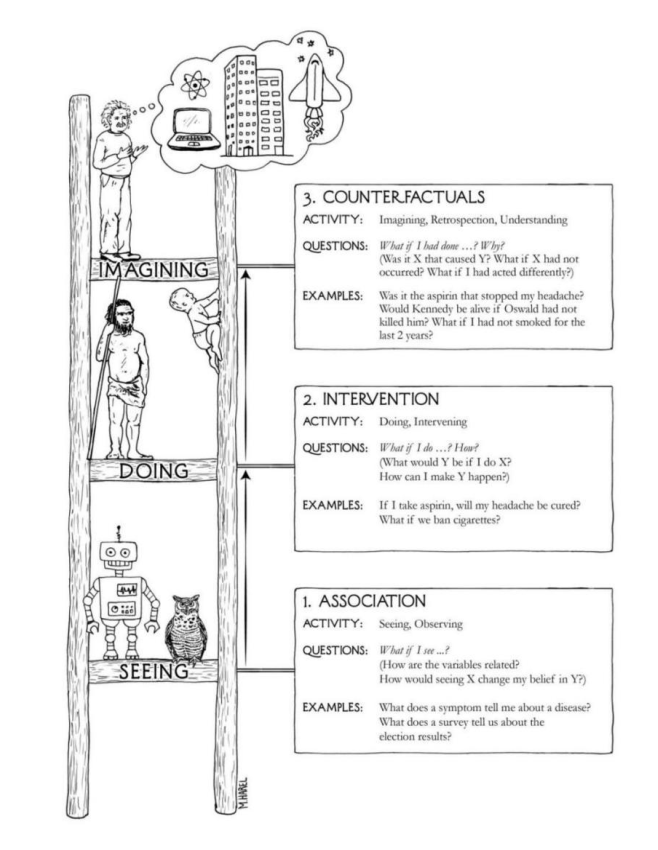

Pearl and Mackenzie 2018, Book of Why, p. 29

Drawing by Maayan Harel

The three levels of *Ladder of Causation* are explained as:

> The Ladder of Causation, with representative organisms
at each level. Most animals, as well as present-day learning machines,
are on the first rung, learning from association. Tool users, such as early
humans, are on the second rung if they act by planning and not merely
by imitation. We can also use experiments to learn the effects of
interventions, and presumably this is how babies acquire much of their
causal knowledge. Counterfactual learners, on the top rung, can imagine
worlds that do not exist and infer reasons for observed phenomena.

He cautions that modern deep learning and similar complex models, while they are becoming better at predicting values are still at the first level of Ladder of Causation: Association. So these models can discover relations. However are not capable of undestanding deeper structures like causation:

> The successes of deep learning have been truly remarkable and have
caught many of us by surprise. Nevertheless, deep learning has succeeded
primarily by showing that certain questions or tasks we thought were difficult
are in fact not. It has not addressed the truly difficult questions that continue
to prevent us from achieving humanlike AI. As a result the public believes
that “strong AI,” machines that think like humans, is just around the corner or
maybe even here already. In reality, nothing could be farther from the truth. I
fully agree with Gary Marcus, a neuroscientist at New York University, who
recently wrote in the New York Times that the field of artificial intelligence is
“bursting with microdiscoveries”—the sort of things that make good press
releases—but machines are still disappointingly far from humanlike cognition.
My colleague in computer science at the University of California, Los
Angeles, Adnan Darwiche, has titled a position paper “Human-Level
Intelligence or Animal-Like Abilities?” which I think frames the question in
just the right way. The goal of strong AI is to produce machines with
humanlike intelligence, able to converse with and guide humans. Deep
learning has instead given us machines with truly impressive abilities but no
intelligence. The difference is profound and lies in the absence of a model of
reality.

Let's emphasize this part:

**Deep learning has instead given us machines with truly impressive abilities but no intelligence. The difference is profound and lies in the absence of a model of reality**

> Just as they did thirty years ago, machine learning programs (including
those with deep neural networks) operate almost entirely in an associational
mode. They are driven by a stream of observations to which they attempt to fit
a function, in much the same way that a statistician tries to fit a line to a
collection of points. Deep neural networks have added many more layers to
the complexity of the fitted function, but raw data still drives the fitting
process. They continue to improve in accuracy as more data are fitted, but
they do not benefit from the “super-evolutionary speedup.” If, for example,
the programmers of a driverless car want it to react differently to new
situations, they have to add those new reactions explicitly. The machine will
not figure out for itself that a pedestrian with a bottle of whiskey in hand is
likely to respond differently to a honking horn. This lack of flexibility and
adaptability is inevitable in any system that works at the first level of the
Ladder of Causation.
> 
> ...
> 
> Intervention ranks higher than association because it involves not just
seeing but changing what is. Seeing smoke tells us a totally different story
about the likelihood of fire than making smoke. We cannot answer questions
about interventions with passively collected data, no matter how big the data
set or how deep the neural network. Many scientists have been quite
traumatized to learn that none of the methods they learned in statistics is
sufficient even to articulate, let alone answer, a simple question like “What
happens if we double the price?” I know this because on many occasions I
have helped them climb to the next rung of the ladder.

> While reasoning about interventions is an important step on the causal
ladder, it still does not answer all questions of interest. We might wonder, My
headache is gone now, but why? Was it the aspirin I took? The food I ate? The
good news I heard? These queries take us to the top rung of the Ladder of
Causation, the level of counterfactuals, because to answer them we must go
back in time, change history, and ask, “What would have happened if I had
not taken the aspirin?” No experiment in the world can deny treatment to an
already treated person and compare the two outcomes, so we must import a
whole new kind of knowledge.

In a similar vein, he reiterates his position on complex associative models in an 2018 interview:

> But as Pearl sees it, the field of AI got mired in probabilistic associations. These days, headlines tout the latest breakthroughs in machine learning and neural networks. We read about computers that can master ancient games and drive cars. Pearl is underwhelmed. As he sees it, the state of the art in artificial intelligence today is merely a souped-up version of what machines could already do a generation ago: find hidden regularities in a large set of data. “All the impressive achievements of deep learning amount to just curve fitting,” he said recently.

(https://www.quantamagazine.org/to-build-truly-intelligent-machines-teach-them-cause-and-effect-20180515/)

Pearl's ideas are also echoed in Chapters 8 and 9 of Kampakis 2023, Predicting the Unknown.

So to recap, all these complex deep learning models with huge number of parameters are just scaled-up **curve fitting** machines. They are doing a good job in extracting regularities and finding relationships hidden in the data.

But we have to go up the ladder of causation, for achieving human-like artificial intelligence.

# Resources

- Claster 2020, Mathematics and Programming for Machine Learning with R, Ch. 9-13
- Ananthaswamy 2024, Why Machines Learn: The Elegant Math Behind Modern AI, Ch. 8-12
- Brasil 2023, Before Machine Learning, Vol. 2: Calculues, Ch. 5.1.8
- Chollet and Allaire 2017, Deep Learning with R, Ch. 1-2
- Ghatak 2019, Deep Learning with R, Ch. 1-2
- Buduma 2022, Fundamentals of Deep Learning, Ch. 3-4
- Beysolow 2017, Introduction to Deep Learning Using R, Ch. 4
- James et al. 2023, An Introduction to Statistical Learning, Ch. 10.
- Lantz 2015, Machine Learning with R, Ch. 7
- Chiu 2015, Machine Learning with R Cookbook, Ch. 6